Error minimizing using different values of angle per increment for each encoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# from support.omniwheel_calculation_pd import *
from support.omniwheel_calculation import *
from datetime import datetime
from support.pd_support import *
from support.calculations_support import *
from support.ar_calculations import *
from numba import njit
import polars as pl
from support.imu_calculations import *

# %matplotlib widget
# import ipywidgets as widgets


In [2]:
_parent_folder = "omni_9dof_april_20_2023"
_folder_name = "sk32_00_test_slow_03"
_base_pth = os.path.dirname(os.getcwd())
_base_pth = os.path.dirname(_base_pth)
_base_pth = os.path.join(_base_pth,"recording_programs", "test_data", _parent_folder)
_base_pth

# C:\Users\CMC\Documents\openposelibs\pose\armbo\recording_programs\test_data\omni_9dof_april_20_2023\sk32_00_test_slow_00\imu01.csv

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\armbo\\recording_programs\\test_data\\omni_9dof_april_20_2023'

In [18]:
_sk_df = pd.read_csv(os.path.join(_base_pth, _folder_name, "imu01.csv"))
# _sk_df["rust_time"] = _sk_df["rust_time"].apply(lambda x: datetime.fromtimestamp(x))
# rename columns
_sk_df.rename(columns={"rust_time": "time", "e_fr":"e_t"}, inplace=True)
_sk_df["e_t"] =  -_sk_df["e_t"]
_sk_df["e_rr"] = -_sk_df["e_rr"]
_sk_df["e_rl"] = _sk_df["e_rl"]

In [24]:
_imu_df = _sk_df[["time", "ax", "ay", "az", "gx", "gy", "gz", "mx", "my", "mz"]]

dt = _imu_df["time"].diff().fillna(0)
_imu_df["dt"] = dt

c:\Users\CMC\anaconda3\envs\gs\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
from imusensor.filters import kalman 
sensorfusion = kalman.Kalman()

In [29]:
"""calculate imu orientation from raw data ax, ay, az, gx, gy, gz, mx, my, mz"""

_roll = np.arctan2(_imu_df["ay"].iloc[0], _imu_df["az"].iloc[0])
_pitch = np.arctan2(-_imu_df["ax"].iloc[0], np.sqrt(_imu_df["ay"].iloc[0]**2 + _imu_df["az"].iloc[0]**2))
_yaw = np.arctan2(_imu_df["my"].iloc[0], _imu_df["mx"].iloc[0])

In [30]:

sensorfusion.roll = _roll
sensorfusion.pitch = _pitch
sensorfusion.yaw = _yaw

In [33]:
data = {"yaw": [], "pitch": [], "roll": []}

for i in range(1, len(_imu_df)):


	# sensorfusion.computeAndUpdateRollPitchYaw(imu.AccelVals[0], imu.AccelVals[1], imu.AccelVals[2], imu.GyroVals[0], imu.GyroVals[1], imu.GyroVals[2],\
	# 											imu.MagVals[0], imu.MagVals[1], imu.MagVals[2], dt)
	
	sensorfusion.computeAndUpdateRollPitchYaw(_imu_df["ax"].iloc[i], _imu_df["ay"].iloc[i], _imu_df["az"].iloc[i], _imu_df["gx"].iloc[i], _imu_df["gy"].iloc[i], _imu_df["gz"].iloc[i],
					   						_imu_df["mx"].iloc[i], _imu_df["my"].iloc[i], _imu_df["mz"].iloc[i], _imu_df["dt"].iloc[i])

	# print("Kalmanroll:{0} KalmanPitch:{1} KalmanYaw:{2} ".format(sensorfusion.roll, sensorfusion.pitch, sensorfusion.yaw))
	data["yaw"].append(sensorfusion.yaw)
	data["pitch"].append(sensorfusion.pitch)
	data["roll"].append(sensorfusion.roll)



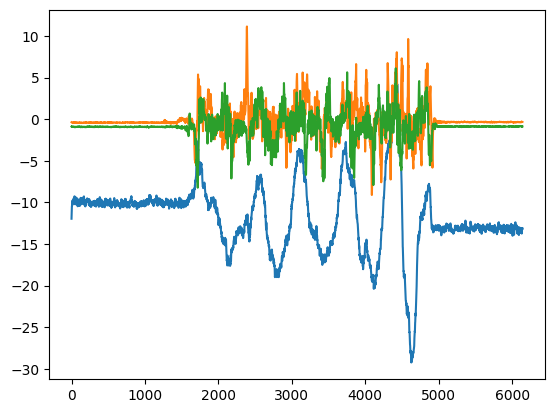

In [35]:
plt.plot(data["yaw"])
plt.plot(data["pitch"])
plt.plot(data["roll"])
